<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/Tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c tabular-playground-series-sep-2021

 98% 198M/203M [00:01<00:00, 148MB/s]
100% 203M/203M [00:01<00:00, 140MB/s]
 98% 387M/394M [00:03<00:00, 107MB/s]
100% 394M/394M [00:03<00:00, 126MB/s]
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 152MB/s]


In [4]:
!unzip '/content/train.csv.zip' -d '/content/'
!unzip '/content/test.csv.zip' -d '/content/'

Archive:  /content/train.csv.zip
  inflating: /content/train.csv      
Archive:  /content/test.csv.zip
  inflating: /content/test.csv       


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
df = pd.read_csv('/content/train.csv')

In [7]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.300,8.6331,4.0607,26.8670,-1.180,10961.00,1.5397,135.3200,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.0,-0.000276,1.090600e+16,1705.400,414.29,3.5392,1888.0,...,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.8862,-0.00558,5252.100,166.690,1.60740,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.6404,31.877,123620.00,1.3951,125.8100,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.0,-0.001344,3.079400e+16,229.100,844.82,1.4680,4726.5,...,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.3880,0.46843,754.610,83.233,1.18900,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.873,7.5463,1.9967,1.9526,817.760,-2948.70,2.0054,1.6826,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.0,-0.002207,5.849100e+13,-897.840,NaN,1.3561,3063.4,...,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,NaN,0.49459,43.524,138.520,1.10790,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840,7.8490,1.0379,8.0030,12.349,-195.28,2.5598,92.1420,0.63789,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.98941,301200.0,NaN,-0.000007,-9.299200e+13,-10.818,1020.30,2.9553,3342.5,...,0.372830,1.5606,1.835400e+10,-3.4298,6485700.0,2120.000,3.081200e+10,34.0560,157.4300,3724.5,8.4211,0.40778,2971.200,204.700,-0.97998,9.94050,12011.000,0.99898,5.063400e+13,1.2261,0.250200,0.72974,373690.0,194.650,120.930,0.260710,0.234240,-0.002794,1.442300e+09,-0.01182,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,1.05310,2.634100e+09,0.29782,2.654800,NaN,1808.900,7.2783,3.9757,NaN,NaN,29520.00,3.4225,96.7250,0.79725,215.570,1.732600e+13,2.635200e+12,2161200.0,0.895470,6.8257,0.97413,142620.0,231350.0,0.001257,1.012500e+16,51.508,293.76,1.3351,3042.1,...,0.085690,1.5846,3.825200e+10,130.7000,102100.0,1951.800,1.142800e+10,58.5660,176.8300,1279.0,4.9662,0.47912,-70.278,10.887,1.14340,6.19120,197.470,NaN,1.574800e+13,1.0083,0.339530,13.48600,201300.0,38.842,324.000,0.238250,0.141550,0.002208,5.830700e+09,0.92739,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


In [8]:
df.isnull().sum()

id           0
f1       15247
f2       15190
f3       15491
f4       15560
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 120, dtype: int64

In [9]:
Y = df.claim

In [10]:
df.drop(['claim','id'],axis = 1,inplace = True)

In [11]:
Y.shape

(957919,)

In [12]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.300,8.6331,4.0607,26.8670,-1.180,10961.00,1.5397,135.3200,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.0,-0.000276,1.090600e+16,1705.400,414.29,3.5392,1888.0,0.968930,...,5.5084,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.8862,-0.00558,5252.100,166.690,1.60740,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770
1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.6404,31.877,123620.00,1.3951,125.8100,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.0,-0.001344,3.079400e+16,229.100,844.82,1.4680,4726.5,0.915380,...,-4.3546,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.3880,0.46843,754.610,83.233,1.18900,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359
2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.873,7.5463,1.9967,1.9526,817.760,-2948.70,2.0054,1.6826,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.0,-0.002207,5.849100e+13,-897.840,NaN,1.3561,3063.4,0.086232,...,4.3931,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,NaN,0.49459,43.524,138.520,1.10790,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690
3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840,7.8490,1.0379,8.0030,12.349,-195.28,2.5598,92.1420,0.63789,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.98941,301200.0,NaN,-0.000007,-9.299200e+13,-10.818,1020.30,2.9553,3342.5,-0.000372,...,9.8105,0.372830,1.5606,1.835400e+10,-3.4298,6485700.0,2120.000,3.081200e+10,34.0560,157.4300,3724.5,8.4211,0.40778,2971.200,204.700,-0.97998,9.94050,12011.000,0.99898,5.063400e+13,1.2261,0.250200,0.72974,373690.0,194.650,120.930,0.260710,0.234240,-0.002794,1.442300e+09,-0.01182,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486
4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,144.120,1.05310,2.634100e+09,0.29782,2.654800,NaN,1808.900,7.2783,3.9757,NaN,NaN,29520.00,3.4225,96.7250,0.79725,215.570,1.732600e+13,2.635200e+12,2161200.0,0.895470,6.8257,0.97413,142620.0,231350.0,0.001257,1.012500e+16,51.508,293.76,1.3351,3042.1,0.006791,...,NaN,0.085690,1.5846,3.825200e+10,130.7000,102100.0,1951.800,1.142800e+10,58.5660,176.8300,1279.0,4.9662,0.47912,-70.278,10.887,1.14340,6.19120,197.470,NaN,1.574800e+13,1.0083,0.339530,13.48600,201300.0,38.842,324.000,0.238250,0.141550,0.002208,5.830700e+09,0.92739,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049


In [13]:
for i in range(1,df.shape[1]+1):
  df['f'+str(i)] = df['f'+str(i)].fillna(df['f'+str(i)].mean())

In [14]:
df.isnull().sum()

f1      0
f2      0
f3      0
f4      0
f5      0
       ..
f114    0
f115    0
f116    0
f117    0
f118    0
Length: 118, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_val,y_train,y_val = train_test_split(df,Y,random_state = 42,test_size = 0.06)

In [17]:
len(x_train),len(x_val)

(900443, 57476)

In [18]:
model = tf.keras.Sequential([
              tf.keras.layers.Dense(128,activation = 'relu'),
              tf.keras.layers.Dropout(rate = 0.5),
              tf.keras.layers.Dense(256,activation='relu'),
              tf.keras.layers.Dense(256,activation='relu'),
              tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train,batch_size=128,epochs = 5,validation_data=(x_val,y_val))

Epoch 1/5
7035/7035 [==============================] - 28s 4ms/step - loss: 11133951934464.0000 - accuracy: 0.5008 - val_loss: 21217185792.0000 - val_accuracy: 0.5003
Epoch 2/5
7035/7035 [==============================] - 28s 4ms/step - loss: 10722298880.0000 - accuracy: 0.4998 - val_loss: 2367461120.0000 - val_accuracy: 0.5004
Epoch 3/5
7035/7035 [==============================] - 27s 4ms/step - loss: 3038554368.0000 - accuracy: 0.5007 - val_loss: 279763136.0000 - val_accuracy: 0.5010
Epoch 4/5
7035/7035 [==============================] - 27s 4ms/step - loss: 411361280.0000 - accuracy: 0.5003 - val_loss: 420463.8125 - val_accuracy: 0.4991
Epoch 5/5
7035/7035 [==============================] - 27s 4ms/step - loss: 5139568.5000 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5009


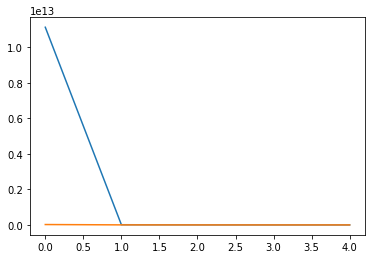

In [37]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.show()

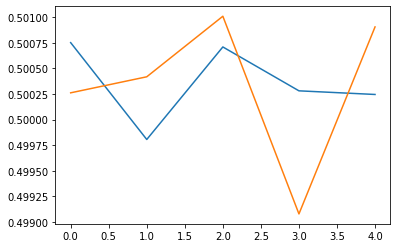

In [38]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()